In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import re

In [2]:
df = pd.read_csv('1185rows.csv') #read data from CSV file
del df['Unnamed: 0']
df.head()


,Title,Company,Location,TypeContrat,Salary,Description,Date,Link
0,Alternance - Data Scientist H/F,Malakoff Humanis,Paris 9e (75),"Apprentissage, Contrat pro",notfound,Contrat\nALTERNANCE\nFinalité du poste\nAu sei...,il y a 3 jours,/pagead/clk?mo=r&ad=-6NYlbfkN0BfLf6vlT6l4ABp3X...
1,DATA analyste informatique (F/H),ACCEO CONSULTING,Paris (75),notfound,notfound,"Actuellement, au sein des équipes BIG DATA et ...",il y a 17 jours,/pagead/clk?mo=r&ad=-6NYlbfkN0AHHRM07jvZ_9CBb8...
2,Chef de Projet Data F/H,TRIMANE,92350 Le Plessis-Robinson,notfound,notfound,TRIMANE est une société de service spécialisée...,il y a 10 jours,/pagead/clk?mo=r&ad=-6NYlbfkN0Bl_GJvjV7T_nyT7Y...
3,Data Scientist H/F,NEOBRAIN,75009 Paris 9e,"Temps plein, CDI",notfound,Neobrain développe des solutions digitales int...,Publiée à l'instant,/company/NEOBRAIN/jobs/Data-Scientist-dfce81a4...
4,Stagiaire Data Scientist H/F,Cocoparks,Paris (75),"Temps plein, Stage",notfound,Description de l'entrepriseCocoparks is an ear...,il y a 2 jours,/company/Cocoparks/jobs/Stagiaire-Data-Scienti...


In [3]:
df.Date.values

array(['il y a 3 jours ', 'il y a 17 jours ', 'il y a 10 jours ', ...,
       'il y a 4 jours ', 'il y a 30+ jours ', 'il y a 6 jours '],
      dtype=object)

In [4]:
df.shape

(1185, 8)

In [5]:
df.nunique(axis=0)

Title          356
Company        305
Location        83
TypeContrat     18
Salary          37
Description    428
Date            29
Link           684
dtype: int64

In [6]:
whos

Variable   Type         Data/Info
---------------------------------
df         DataFrame                             <...>\n[1185 rows x 8 columns]
np         module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd         module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt        module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
re         module       <module 're' from 'C:\\Us<...>\\anaconda3\\lib\\re.py'>
sns        module       <module 'seaborn' from 'C<...>s\\seaborn\\__init__.py'>
stats      module       <module 'scipy.stats' fro<...>ipy\\stats\\__init__.py'>


# Faire le tri dans les données

Text(0.5, 1, 'Missing values')

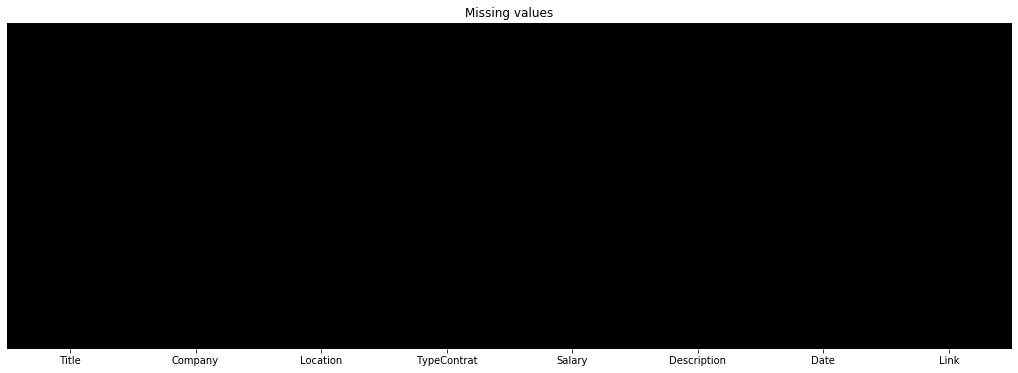

In [7]:
# répartion des valeurs manquantes
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 6))
sns.heatmap(df.isnull(), yticklabels=False, ax = ax, cbar=False, cmap='copper')
ax.set_title('Missing values')

In [8]:
def ames_eda(df): 
    eda_df = {}
    eda_df['null_sum'] = df.isnull().sum()
    eda_df['null_pct'] = df.isnull().mean()
    eda_df['dtypes'] = df.dtypes
    eda_df['count'] = df.count()
    eda_df['mean'] = df.mean()
    eda_df['median'] = df.median()
    eda_df['min'] = df.min()
    eda_df['max'] = df.max()
    return pd.DataFrame(eda_df)
ames_eda(df)

,null_sum,null_pct,dtypes,count,mean,median,min,max
Company,0,0.0,object,1185,NaN,NaN,360LEARNING,sense4data
Date,0,0.0,object,1185,NaN,NaN,Bordeaux,il y a 9 jours
Description,0,0.0,object,1185,NaN,NaN,#AMilleLieuxD'EtreImmobile\n\nLeader de l'audi...,— TES MISSIONS\n\nAu sein d’une fintech en ple...
Link,0,0.0,object,1185,NaN,NaN,/company/ABSIS-CONSEIL/jobs/Data-Scientist-918...,/rc/clk?jk=ff61d9c5fefb9de8&fccid=aa1bd64e6087...
Location,0,0.0,object,1185,NaN,NaN,33000 Bordeaux,Écully (69)
Salary,0,0.0,object,1185,NaN,NaN,100 000 € - 130 000 € par an,notfound
Title,0,0.0,object,1185,NaN,NaN,(M/F) Experienced R&D Engineer 1,WEB ANALYST F/H
TypeContrat,0,0.0,object,1185,NaN,NaN,"Apprentissage, Contrat pro",notfound


#### colonne date

In [9]:
df.Date.value_counts()

il y a 30+ jours        741
il y a 4 jours           56
il y a 6 jours           52
il y a 12 jours          37
il y a 3 jours           28
Center Parcs             27
il y a 25 jours          24
Publiée à l'instant      22
il y a 10 jours          21
il y a 14 jours          18
il y a 27 jours          16
il y a 19 jours          16
il y a 20 jours          14
il y a 5 jours           13
il y a 17 jours          12
il y a 28 jours          11
il y a 18 jours          10
il y a 24 jours          10
Bordeaux                 10
il y a 21 jours          10
il y a 2 jours            9
il y a 11 jours           8
il y a 13 jours           7
il y a 7 jours            5
il y a 26 jours           4
il y a 1 jour             1
il y a 23 jours           1
il y a 9 jours            1
il y a 22 jours           1
Name: Date, dtype: int64

In [10]:
# conversion de la colonne Date 
col = []
for i in df['Date']:
    if i == "Publiée à l'instant ":
        col.append(0)
    else:
        try:
            col.append(int(i.split(" ")[3][:2]))
        except:
            col.append("NA")
df['Date_c'] = col
del df['Date']

#### colonne TypeContrat

In [11]:
df.TypeContrat.value_counts()

notfound                                                 473
CDI                                                      324
Temps plein, CDI                                         190
CDD, CDI                                                  51
Stage                                                     39
Apprentissage, Contrat pro                                31
Temps plein, Intérim                                      20
Temps plein, Freelance / Indépendant                      16
Temps plein, Apprentissage, Contrat pro                   13
Temps plein, Stage                                        11
Intérim                                                    9
Temps plein, CDD                                           2
CDD, Freelance / Indépendant, CDI                          1
CDD                                                        1
Temps plein, CDD, CDI                                      1
Stage, CDI                                                 1
Temps plein, Stage, Appr

In [12]:
df.TypeContrat = [i.replace(' /',',') for i in df.TypeContrat]    

In [13]:
df.TypeContrat.value_counts()

notfound                                                 473
CDI                                                      324
Temps plein, CDI                                         190
CDD, CDI                                                  51
Stage                                                     39
Apprentissage, Contrat pro                                31
Temps plein, Intérim                                      20
Temps plein, Freelance, Indépendant                       16
Temps plein, Apprentissage, Contrat pro                   13
Temps plein, Stage                                        11
Intérim                                                    9
Temps plein, CDD                                           2
Temps plein, CDD, CDI                                      1
CDD, Freelance, Indépendant, CDI                           1
CDD                                                        1
Stage, CDI                                                 1
Temps plein, Stage, Appr

#### Title

In [14]:
df.Title

0                 Alternance - Data Scientist H/F
1                DATA analyste informatique (F/H)
2                         Chef de Projet Data F/H
3                              Data Scientist H/F
4                    Stagiaire Data Scientist H/F
                          ...                    
1180    ANALYSTE EN INFORMATIQUE INDUSTRIELLE H/F
1181           Leader Technique BI H/F (Bordeaux)
1182    ANALYSTE EN INFORMATIQUE INDUSTRIELLE H/F
1183              Consultant Java, J2EE H/F (Pau)
1184    Officier commissionné - Data Engineer H/F
Name: Title, Length: 1185, dtype: object

In [15]:
df.Title = [i.lower() for i in df.Title]

In [16]:
df

,Title,Company,Location,TypeContrat,Salary,Description,Link,Date_c
0,alternance - data scientist h/f,Malakoff Humanis,Paris 9e (75),"Apprentissage, Contrat pro",notfound,Contrat\nALTERNANCE\nFinalité du poste\nAu sei...,/pagead/clk?mo=r&ad=-6NYlbfkN0BfLf6vlT6l4ABp3X...,3
1,data analyste informatique (f/h),ACCEO CONSULTING,Paris (75),notfound,notfound,"Actuellement, au sein des équipes BIG DATA et ...",/pagead/clk?mo=r&ad=-6NYlbfkN0AHHRM07jvZ_9CBb8...,17
2,chef de projet data f/h,TRIMANE,92350 Le Plessis-Robinson,notfound,notfound,TRIMANE est une société de service spécialisée...,/pagead/clk?mo=r&ad=-6NYlbfkN0Bl_GJvjV7T_nyT7Y...,10
3,data scientist h/f,NEOBRAIN,75009 Paris 9e,"Temps plein, CDI",notfound,Neobrain développe des solutions digitales int...,/company/NEOBRAIN/jobs/Data-Scientist-dfce81a4...,0
4,stagiaire data scientist h/f,Cocoparks,Paris (75),"Temps plein, Stage",notfound,Description de l'entrepriseCocoparks is an ear...,/company/Cocoparks/jobs/Stagiaire-Data-Scienti...,2
...,...,...,...,...,...,...,...,...
1180,analyste en informatique industrielle h/f,Proman interim,Mérignac (33),Intérim,notfound,Votre agence PROMAN BORDEAUX RECRUTEMENT reche...,/rc/clk?jk=3608aa8e53dea31f&fccid=d2d18ddd5178...,4
1181,leader technique bi h/f (bordeaux),Keyrus,Bordeaux (33),CDI,notfound,Qui sommes-nous ?\nUne success story dans la D...,/rc/clk?jk=5639f3c3fb2004bc&fccid=19a55a04a564...,30
1182,analyste en informatique industrielle h/f,PROMAN BORDEAUX RECRUTEMENT,33700 Mérignac,"Temps plein, Intérim",notfound,PROMAN est un acteur majeur dans le domaine de...,/rc/clk?jk=2c6c24c36f6014c5&fccid=7d8403e39250...,4
1183,"consultant java, j2ee h/f (pau)",Keyrus,Bordeaux (33),CDI,notfound,Qui sommes-nous ?\nUne success story dans la D...,/rc/clk?jk=78a40eeae476bb35&fccid=19a55a04a564...,30


#### Salary

In [17]:
df.Salary.value_counts()

notfound                        1021
2 210 € - 2 500 € par mois        45
45 000 € - 50 000 € par an        19
40 000 € - 50 000 € par an        11
30 000 € - 45 000 € par an        11
55 000 € par an                   10
55 000 € - 65 000 € par an         9
40 000 € - 60 000 € par an         7
28 090 € - 54 693 € par an         6
42 000 € par an                    5
75 000 € par an                    4
50 000 € - 70 000 € par an         3
40 000 € - 55 000 € par an         3
45 000 € - 55 000 € par an         3
70 000 € par an                    3
40 000 € - 70 000 € par an         2
100 000 € - 130 000 € par an       2
26 911 € - 49 402 € par an         2
40 000 € - 45 000 € par an         1
2 436 € - 2 821 € par mois         1
500 € par jour                     1
35 000 € - 40 000 € par an         1
50 000 € - 55 000 € par an         1
35 000 € - 90 000 € par an         1
34 000 € par an                    1
50 000 € - 60 000 € par an         1
30 000 € - 50 000 € par an         1
8

In [18]:
df.Salary.value_counts()
df["Salary_date"] = [i.split(" ")[-1] for i in df.Salary]

In [19]:
s_min=[]
s_max=[]
for i in df["Salary"]:
    if i != "notfound":
        
        values = re.findall('[0-9]*[\xa0]*[0-9]+', i)
        values = [i.replace("\xa0", "") for i in values]
        print(values)
        s_min.append(values[0])
        s_max.append(values[-1])
    else:
        s_min.append('NA')
        s_max.append('NA')
df['Salary_min'] = s_min
df['Salary_max'] = s_max

['42000']
['1500', '1700']
['40000', '60000']
['45000', '50000']
['45000', '55000']
['40000', '60000']
['45000', '50000']
['45000', '50000']
['40000', '60000']
['42000']
['45000', '50000']
['40000', '55000']
['70000']
['45000', '50000']
['50000', '70000']
['45000', '50000']
['45000', '50000']
['70000']
['40000', '55000']
['45000', '50000']
['28090', '54693']
['55000']
['55000']
['55000']
['55000']
['55000']
['55000']
['55000']
['55000']
['55000']
['34000']
['2436', '2821']
['32000', '37000']
['55000', '65000']
['1000']
['45000', '50000']
['75000']
['45000', '55000']
['50000', '60000']
['800']
['42000']
['100000', '130000']
['45000', '50000']
['55000', '65000']
['42000']
['70000']
['100000', '130000']
['50000', '70000']
['45000', '50000']
['2210', '2500']
['75000']
['55000', '65000']
['40000', '60000']
['55000']
['55000', '65000']
['45000', '50000']
['2210', '2500']
['45000', '50000']
['55000', '65000']
['40000', '60000']
['40000', '50000']
['40000', '60000']
['2210', '2500']
['45000', 

In [20]:
df[df["Salary_date"]!="notfound"]

,Title,Company,Location,TypeContrat,Salary,Description,Link,Date_c,Salary_date,Salary_min,Salary_max
18,data scientist-engineers,Axance,75018 Paris 18e,notfound,42 000 € par an,MISSIONS\nLES MISSIONS DU Data scientist-engin...,/rc/clk?jk=7bfce6fcc0a8ab81&fccid=e845d6b729b5...,30,an,42000,42000
23,data scientist intern,Justice.cool,Paris (75),Intérim,1 500 € - 1 700 € par mois,DESCRIPTIF DU POSTE\n\nIntégré(e) au sein d'un...,/rc/clk?jk=16c407a3b84dfb3f&fccid=c47c5171d554...,28,mois,1500,1700
29,consultant data scientist f/h,INEOX,Paris (75),"Temps plein, CDI",40 000 € - 60 000 € par an,"La société de conseil INEOX, experte en transf...",/company/INEOX/jobs/Consultant-Data-Scientist-...,30,an,40000,60000
38,data engineer,HireFirst,75002 Paris 2e,CDI,45 000 € - 50 000 € par an,Le client final\n- Plateforme spécialisée dans...,/pagead/clk?mo=r&ad=-6NYlbfkN0AS2YX6eY8dk8I-hA...,12,an,45000,50000
44,"développeur backend, data, cloud adtech",HireFirst,75008 Paris 8e,CDI,45 000 € - 55 000 € par an,Le client final\n• Solution qui permet aux édi...,/pagead/clk?mo=r&ad=-6NYlbfkN0AS2YX6eY8dk8I-hA...,30,an,45000,55000
...,...,...,...,...,...,...,...,...,...,...,...
1151,officier commissionné - data engineer h/f,Marine Nationale,33000 Bordeaux,notfound,2 210 € - 2 500 € par mois,Environnement du poste\nLe Centre d’Expertise ...,/pagead/clk?mo=r&ad=-6NYlbfkN0B7QfZaTj_N6KUh74...,6,mois,2210,2500
1162,officier commissionné - data engineer h/f,Marine Nationale,33000 Bordeaux,notfound,2 210 € - 2 500 € par mois,Environnement du poste\nLe Centre d’Expertise ...,/pagead/clk?mo=r&ad=-6NYlbfkN0B7QfZaTj_N6KUh74...,6,mois,2210,2500
1173,officier commissionné - data engineer h/f,Marine Nationale,33000 Bordeaux,notfound,2 210 € - 2 500 € par mois,Environnement du poste\nLe Centre d’Expertise ...,/pagead/clk?mo=r&ad=-6NYlbfkN0B7QfZaTj_N6KUh74...,6,mois,2210,2500
1177,analyste cobol (h/f),ACTIVUS Group,Bordeaux (33),"Temps plein, CDI",28 090 € - 54 693 € par an,Pour renforcer notre pôle Applications Digital...,/company/ACTIVUS-Group/jobs/Analyste-Cobol-812...,3,an,28090,54693


In [21]:
df

,Title,Company,Location,TypeContrat,Salary,Description,Link,Date_c,Salary_date,Salary_min,Salary_max
0,alternance - data scientist h/f,Malakoff Humanis,Paris 9e (75),"Apprentissage, Contrat pro",notfound,Contrat\nALTERNANCE\nFinalité du poste\nAu sei...,/pagead/clk?mo=r&ad=-6NYlbfkN0BfLf6vlT6l4ABp3X...,3,notfound,NA,NA
1,data analyste informatique (f/h),ACCEO CONSULTING,Paris (75),notfound,notfound,"Actuellement, au sein des équipes BIG DATA et ...",/pagead/clk?mo=r&ad=-6NYlbfkN0AHHRM07jvZ_9CBb8...,17,notfound,NA,NA
2,chef de projet data f/h,TRIMANE,92350 Le Plessis-Robinson,notfound,notfound,TRIMANE est une société de service spécialisée...,/pagead/clk?mo=r&ad=-6NYlbfkN0Bl_GJvjV7T_nyT7Y...,10,notfound,NA,NA
3,data scientist h/f,NEOBRAIN,75009 Paris 9e,"Temps plein, CDI",notfound,Neobrain développe des solutions digitales int...,/company/NEOBRAIN/jobs/Data-Scientist-dfce81a4...,0,notfound,NA,NA
4,stagiaire data scientist h/f,Cocoparks,Paris (75),"Temps plein, Stage",notfound,Description de l'entrepriseCocoparks is an ear...,/company/Cocoparks/jobs/Stagiaire-Data-Scienti...,2,notfound,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...
1180,analyste en informatique industrielle h/f,Proman interim,Mérignac (33),Intérim,notfound,Votre agence PROMAN BORDEAUX RECRUTEMENT reche...,/rc/clk?jk=3608aa8e53dea31f&fccid=d2d18ddd5178...,4,notfound,NA,NA
1181,leader technique bi h/f (bordeaux),Keyrus,Bordeaux (33),CDI,notfound,Qui sommes-nous ?\nUne success story dans la D...,/rc/clk?jk=5639f3c3fb2004bc&fccid=19a55a04a564...,30,notfound,NA,NA
1182,analyste en informatique industrielle h/f,PROMAN BORDEAUX RECRUTEMENT,33700 Mérignac,"Temps plein, Intérim",notfound,PROMAN est un acteur majeur dans le domaine de...,/rc/clk?jk=2c6c24c36f6014c5&fccid=7d8403e39250...,4,notfound,NA,NA
1183,"consultant java, j2ee h/f (pau)",Keyrus,Bordeaux (33),CDI,notfound,Qui sommes-nous ?\nUne success story dans la D...,/rc/clk?jk=78a40eeae476bb35&fccid=19a55a04a564...,30,notfound,NA,NA
